### Please review Part one of this Full Ironman Championship races Data analysis for Introduction and Male Athletes Results (https://www.kaggle.com/mohamadabouelela/full-ironman-history-eda-part-one)

### In this Notebook we Explore Female Athletes Results as well as overall comparison and conclusion notes 

In [2]:
# import required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sys
from datetime import time
%matplotlib inline 

In [3]:
df = pd.read_csv('Ironman World Championship.csv', encoding= 'unicode_escape')
print (df.shape)
df.head()

(252, 6)


,Year,Place,Athlete,Country,Time,Gender
0,2019,1,Jan Frodeno,GER,7:51:13,Male
1,2018,1,Patrick Lange,GER,7:52:39,Male
2,2017,1,Patrick Lange,GER,8:01:40,Male
3,2016,1,Jan Frodeno,GER,8:06:30,Male
4,2015,1,Jan Frodeno,GER,8:14:40,Male


In [4]:
# Change Time to Datetime object
df['Time'] = pd.to_datetime(df['Time'], format ='%H:%M:%S').dt.time

In [5]:
# Create minutes columns with time in minutes
minutes = []

for i in df['Time']:
    minutes.append(i.hour *60 + i.minute + i.second /60)
    
    
df['Minutes'] = minutes
df['Minutes'] = df['Minutes'].round(decimals = 2)

In [6]:
# Create Male dataframe
df_male = df[df['Gender'] == 'Male']
df_male.head()

,Year,Place,Athlete,Country,Time,Gender,Minutes
0,2019,1,Jan Frodeno,GER,07:51:13,Male,471.22
1,2018,1,Patrick Lange,GER,07:52:39,Male,472.65
2,2017,1,Patrick Lange,GER,08:01:40,Male,481.67
3,2016,1,Jan Frodeno,GER,08:06:30,Male,486.50
4,2015,1,Jan Frodeno,GER,08:14:40,Male,494.67


In [7]:
# create female dataframe
df_female = df[df['Gender'] == 'Female']
df_female.head()

,Year,Place,Athlete,Country,Time,Gender,Minutes
129,2019,1,Anne Haug,GER,08:40:10,Female,520.17
130,2018,1,Daniela Ryf,SUI,08:26:18,Female,506.30
131,2017,1,Daniela Ryf,SUI,08:50:47,Female,530.78
132,2016,1,Daniela Ryf,SUI,08:46:46,Female,526.77
133,2015,1,Daniela Ryf,SUI,08:57:57,Female,537.95


In [181]:
# Create males first, second, and third place dataframe
df_male_first = df_male[df_male['Place'] == 1]
df_male_second = df_male[df_male['Place'] == 2]
df_male_third = df_male[df_male['Place'] == 3]

In [9]:
# Create females first, second, and third place dataframe
df_female_first = df_female[df_female['Place'] == 1]
df_female_second = df_female[df_female['Place'] == 2]
df_female_third = df_female[df_female['Place'] == 3]

In [10]:
# Sort Dataframes in ascending order
df_male_first.sort_values(['Minutes'], axis =0, inplace = True)
df_male_second.sort_values(['Minutes'], axis =0, inplace = True)
df_male_third.sort_values(['Minutes'], axis =0, inplace = True)
df_female_first.sort_values(['Minutes'], axis =0, inplace = True)
df_female_second.sort_values(['Minutes'], axis =0, inplace = True)
df_female_third.sort_values(['Minutes'], axis =0, inplace = True)

C:\users\lenovo\ztm\projects\env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\users\lenovo\ztm\projects\env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\users\lenovo\ztm\projects\env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [23]:
# sort dataframes Index
df_male_second.reset_index(inplace = True)
df_male_third.reset_index(inplace = True)
df_female_first.reset_index(inplace = True)
df_female_second.reset_index(inplace = True)
df_female_third.reset_index(inplace = True)

# Female Athletes with most First, Second, Third podium finishes of the Iconic Race ?


## First Place Athletes

In [12]:
### First place male Athletes 
athlete_order = df_female_first['Athlete'].value_counts().index
country_order = df_female_first['Country'].value_counts().index

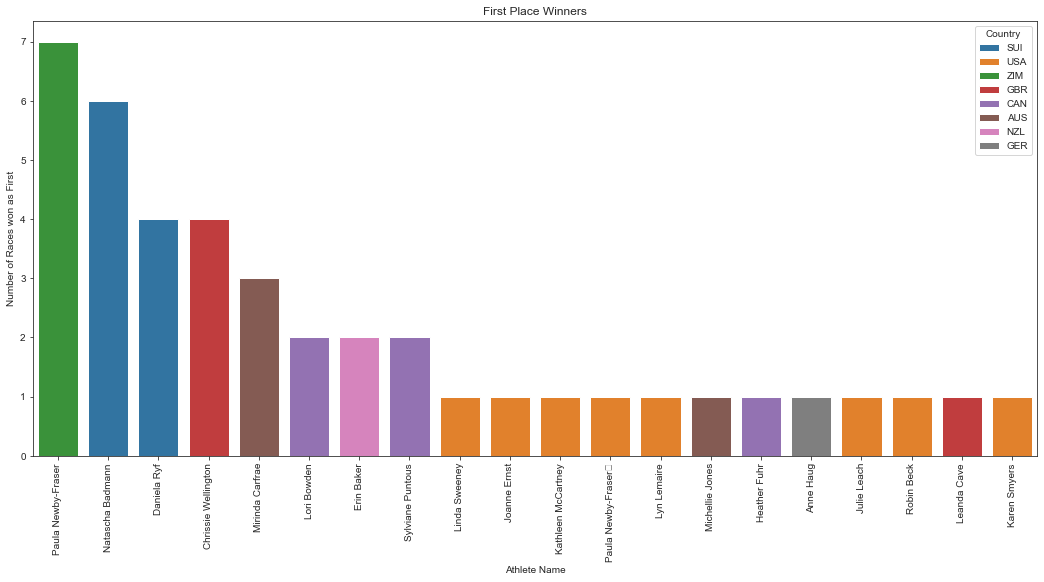

In [14]:
plt.figure(figsize = [18,8])
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,10,1))
sb.set_style('ticks')
sb.countplot(data = df_female_first, x = 'Athlete', order = athlete_order, hue = 'Country', hue_order = country_order, dodge = False)
plt.legend(loc='upper right')
plt.ylabel("Number of Races won as First")
plt.xlabel ('Athlete Name')
plt.title('First Place Winners')
plt.legend(title ='Country', loc = 'upper right');

## Second Place Athletes

In [15]:
# Second place male Athletes 
athlete_order = df_female_second['Athlete'].value_counts().index
country_order = df_female_second['Country'].value_counts().index

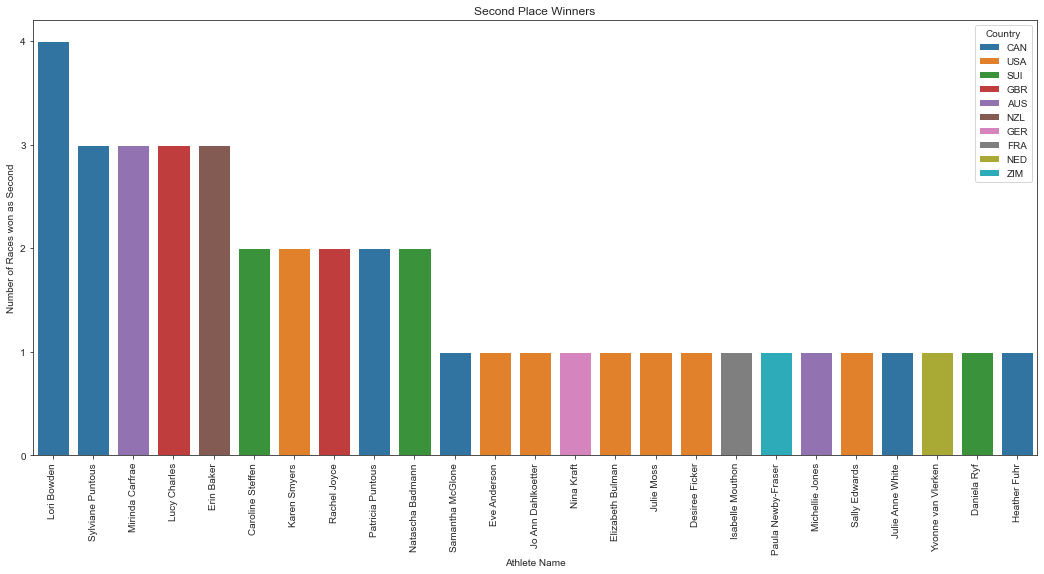

In [16]:
plt.figure(figsize = [18,8])
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,10,1))
sb.set_style('whitegrid')
sb.countplot(data = df_female_second, x = 'Athlete', order = athlete_order, hue = 'Country', hue_order = country_order, dodge = False)
plt.legend(loc='upper right')
plt.ylabel("Number of Races won as Second")
plt.xlabel ('Athlete Name')
plt.title('Second Place Winners')
plt.legend(title ='Country',loc = 'upper right');

## Third Place Athletes

In [19]:
# Third place male Athletes 
athlete_order = df_female_third['Athlete'].value_counts().index
country_order = df_female_third['Country'].value_counts().index

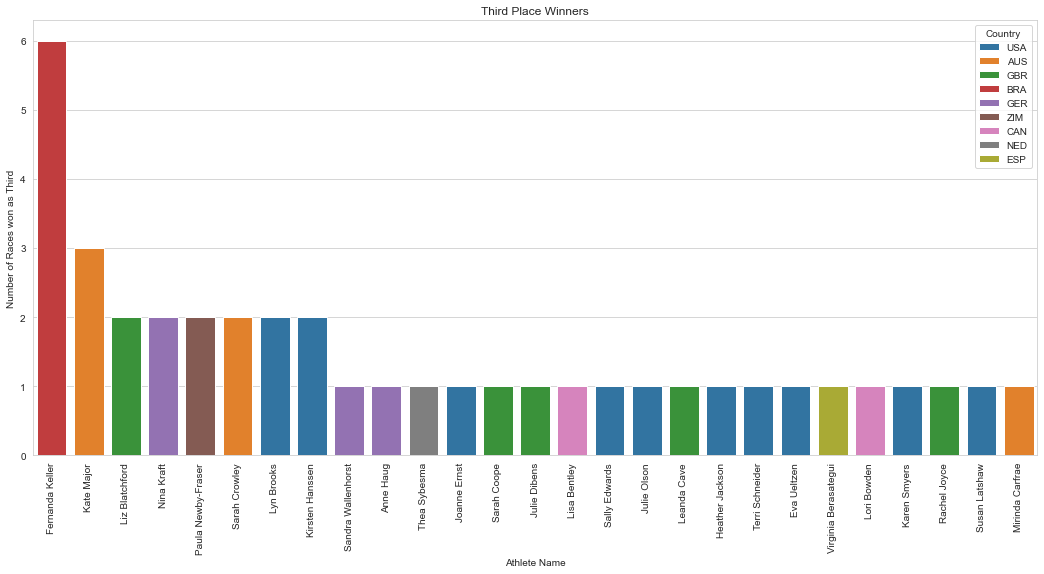

In [20]:
plt.figure(figsize = [18,8])
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,10,1))
#sb.set_style('ticks')
sb.countplot(data = df_female_third, x = 'Athlete', order = athlete_order, hue = 'Country', hue_order = country_order, dodge = False)
plt.legend(loc='upper right')
plt.ylabel("Number of Races won as Third")
plt.xlabel ('Athlete Name')
plt.title('Third Place Winners')
plt.legend(title ='Country',loc = 'upper right');

# Fasest and Slowest podium finsihes ?

In [31]:
df_female_third.tail()

,level_0,index,Year,Place,Athlete,Country,Time,Gender,Minutes
35,35,247,1984,3,Julie Olson,USA,10:38:10,Female,638.17
36,36,248,1983,3,Eva Ueltzen,USA,11:01:49,Female,661.82
37,37,249,1982,3,Sally Edwards,USA,11:03:00,Female,663.00
38,38,250,1982,3,Lyn Brooks,USA,11:51:00,Female,711.00
39,39,251,1981,3,Lyn Brooks,USA,12:42:15,Female,762.25


In [26]:
first_fastest_time_min = df_female_first['Minutes'].min()
first_fastest_time = df_female_first['Time'][0]
first_fastest_athlete = df_female_first['Athlete'][0]
first_fastest_year = df_female_first['Year'][0]
first_slowest_time_min = df_female_first['Minutes'].max()
first_slowest_time = df_female_first['Time'][41]
first_slowest_athlete = df_female_first['Athlete'][41]
first_slowest_year = df_female_first['Year'][41]

In [29]:
second_fastest_time_min = df_female_second['Minutes'].min()
second_fastest_time = df_female_second['Time'][0]
second_fastest_athlete = df_female_second['Athlete'][0]
second_fastest_year = df_female_second['Year'][0]
second_slowest_time_min = df_female_second['Minutes'].max()
second_slowest_time = df_female_second['Time'][40]
second_slowest_athlete = df_female_second['Athlete'][40]
second_slowest_year = df_female_second['Year'][40]

In [32]:
third_fastest_time_min = df_female_third['Minutes'].min()
third_fastest_time = df_female_third['Time'][0]
third_fastest_athlete = df_female_third['Athlete'][0]
third_fastest_year = df_female_third['Year'][0]
third_slowest_time_min = df_female_third['Minutes'].max()
third_slowest_time = df_female_third['Time'][39]
third_slowest_athlete = df_female_third['Athlete'][39]
third_slowest_year = df_female_third['Year'][39]

## First Place

C:\users\lenovo\ztm\projects\env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 134 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\users\lenovo\ztm\projects\env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 134 missing from current font.
  font.set_text(s, 0, flags=flags)


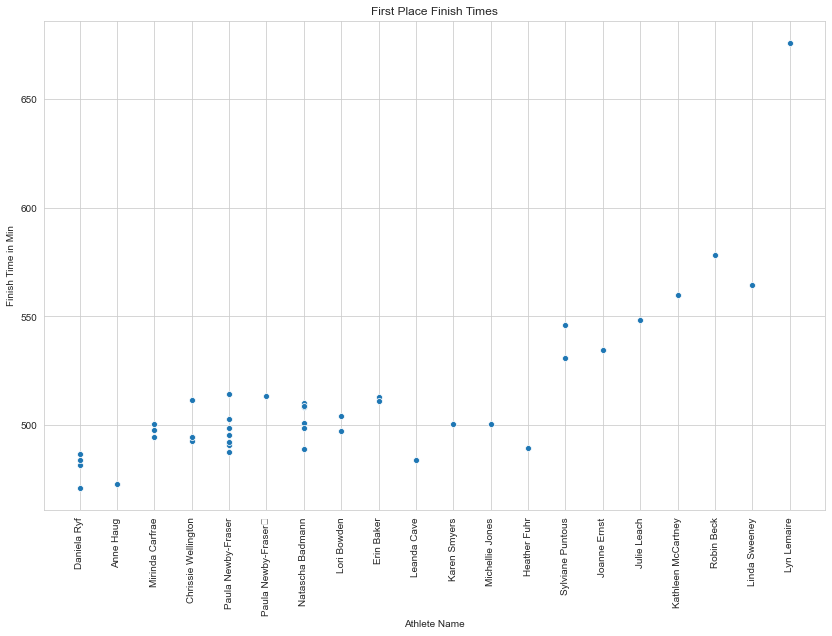

In [33]:
## Finishing Times
plt.figure(figsize = (14,9))
sb.set_style('whitegrid')
sb.scatterplot(x= df_female_first['Athlete'], y = df_male_first['Minutes'])
plt.xticks(rotation = 90)
plt.xlabel ("Athlete Name")
plt.ylabel('Finish Time in Min')
plt.title("First Place Finish Times");

In [34]:
print (f'Fastest Kona First Place finishing time is {first_fastest_time_min} Min ({first_fastest_time}) by {first_fastest_athlete}- {first_fastest_year}')  
print (f'Slowest Kona First Place finishing time is {first_slowest_time_min} Min ({first_slowest_time}) by {first_slowest_athlete}- {first_slowest_year}')

Fastest Kona First Place finishing time is 506.3 Min (08:26:18) by Daniela Ryf- 2018
Slowest Kona First Place finishing time is 775.63 Min (12:55:38) by Lyn Lemaire- 1979


## Second Place

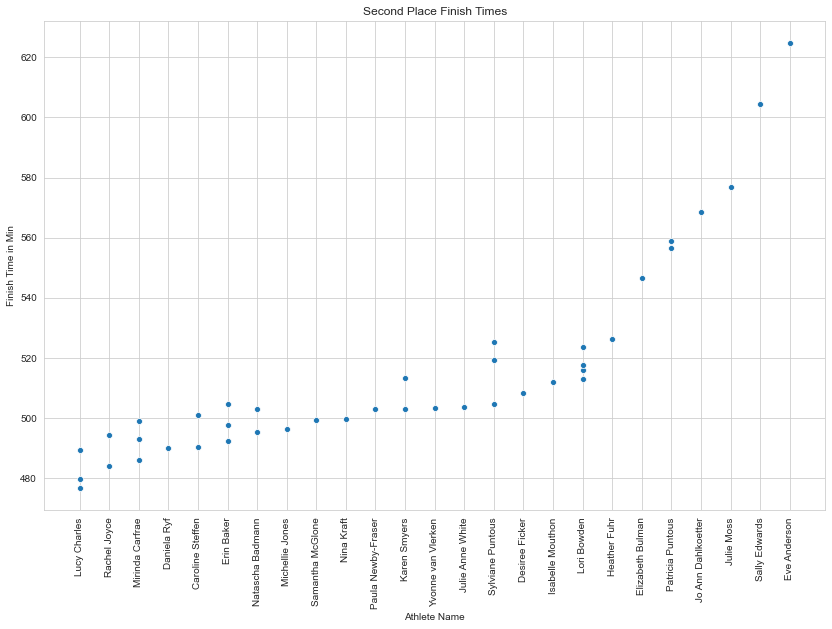

In [35]:
plt.figure(figsize = (14,9))
sb.set_style('whitegrid')
sb.scatterplot(x= df_female_second['Athlete'], y = df_male_second['Minutes'])
plt.xticks(rotation = 90)
plt.title("Second Place Finish Times")
plt.xlabel ("Athlete Name")
plt.ylabel('Finish Time in Min');

In [36]:
print (f'Fastest Kona Second Place finishing time is {second_fastest_time_min} Min ({second_fastest_time}) by {second_fastest_athlete}- {second_fastest_year}')  
print (f'Slowest Kona Second Place finishing time is {second_slowest_time_min} Min ({second_slowest_time}) by {second_slowest_athlete}- {second_slowest_year}')

Fastest Kona Second Place finishing time is 516.53 Min (08:36:32) by Lucy Charles- 2018
Slowest Kona Second Place finishing time is 940.98 Min (15:40:59) by Eve Anderson- 1980


## Third Place

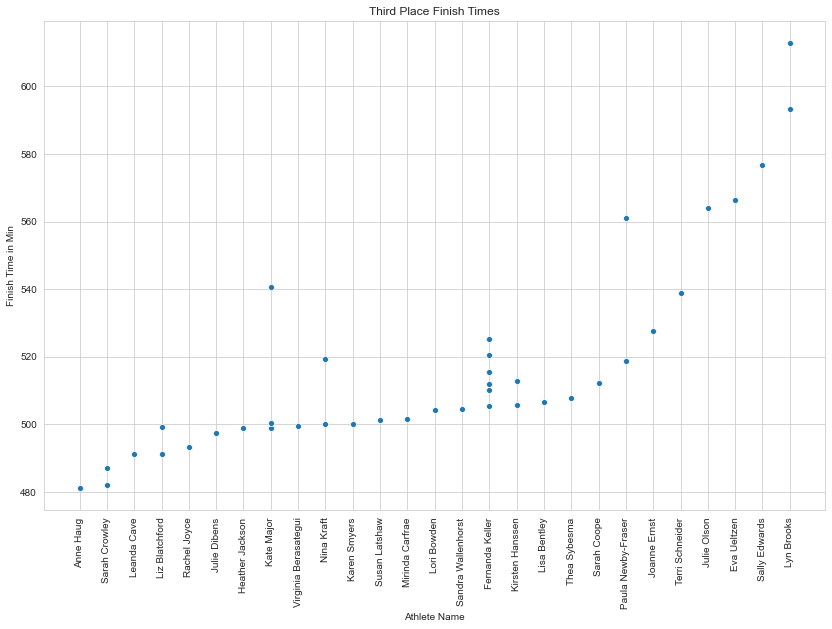

In [37]:
plt.figure(figsize = (14,9))
sb.set_style('whitegrid')
sb.scatterplot(x= df_female_third['Athlete'], y = df_male_third['Minutes'])
plt.xticks(rotation = 90)
plt.title("Third Place Finish Times")
plt.xlabel ("Athlete Name")
plt.ylabel('Finish Time in Min');

In [38]:
print (f'Fastest Kona Third Place finishing time is {third_fastest_time_min} Min ({third_fastest_time}) by {third_fastest_athlete}- {third_fastest_year}')  
print (f'Slowest Kona Third Place finishing time is {third_slowest_time_min} Min ({third_slowest_time}) by {third_slowest_athlete}- {third_slowest_year}')

Fastest Kona Third Place finishing time is 521.95 Min (08:41:57) by Anne Haug- 2018
Slowest Kona Third Place finishing time is 762.25 Min (12:42:15) by Lyn Brooks- 1981


# Which country has top Female podium first / second / third Finishes ?

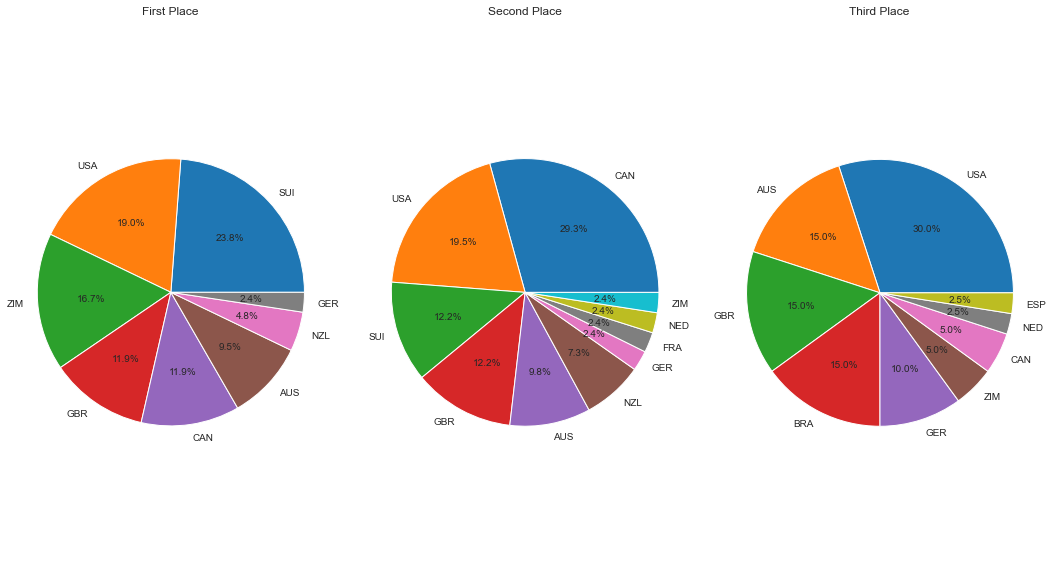

In [39]:
plt.figure(figsize = (18,10))
plt.subplot(1,3,1)
plt.pie(df_female_first['Country'].value_counts(), 
        labels = df_female_first['Country'].value_counts().index, autopct='%1.1f%%')
plt.title('First Place')
plt.axis ('equal')
plt.subplot(1,3,2)
plt.pie(df_female_second['Country'].value_counts(), 
        labels = df_female_second['Country'].value_counts().index, autopct='%1.1f%%')
plt.title('Second Place')
plt.axis ('equal')
plt.subplot(1,3,3)
plt.pie(df_female_third['Country'].value_counts(), 
        labels = df_female_third['Country'].value_counts().index, autopct='%1.1f%%')
plt.title('Third Place')
plt.axis ('equal');

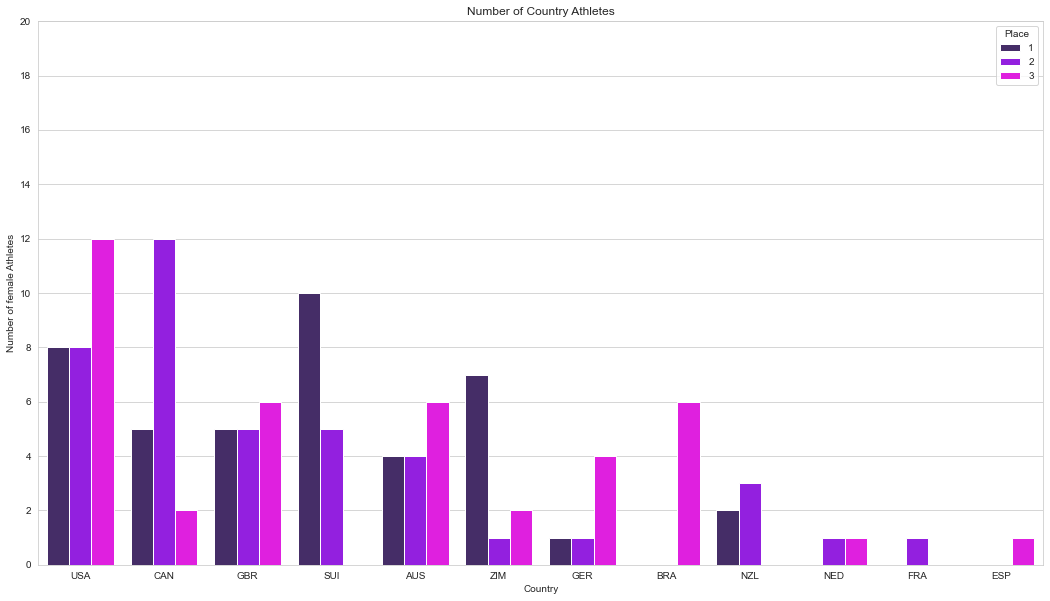

In [82]:
# Number of Wining Male Athletes from each country
country_order = df_female['Country'].value_counts()
base_color = sb.color_palette("Spectral")[4]
plt.figure(figsize = (18,10))
sb.set_style('whitegrid')
sb.countplot(data = df_female, x = 'Country', 
             order = country_order.index, 
             hue = 'Place',
             palette=['#432371',"#9900ff","#ff00ff"])
plt.ylabel ('Number of female Athletes')
plt.title ('Number of Country Athletes')
plt.yticks(np.arange(0,21,2))
plt.legend (title = 'Place', loc = 'upper right');

In [83]:
print (f'{df_female.Country.value_counts().index[0]} has most Female podium finishes - {df_female.Country.value_counts().values[0]} Podium - ({df_female_first.Country.value_counts().values[0]}) first, ({df_female_second.Country.value_counts().values[0]}) second, ({df_female_third.Country.value_counts().values[0]}) third')
print (f'{df_female.Country.value_counts().index[1]} has the Second Female podium finishes - {df_female.Country.value_counts().values[1]} Podium - ({df_female_first.Country.value_counts().values[1]}) first, ({df_female_second.Country.value_counts().values[1]}) second, ({df_female_third.Country.value_counts().values[1]}) third')
print (f'{df_female.Country.value_counts().index[2]} has the Third Female podium finishes - {df_female.Country.value_counts().values[2]} Podium - ({df_female_first.Country.value_counts().values[2]}) first, ({df_female_second.Country.value_counts().values[2]}) second, ({df_female_third.Country.value_counts().values[2]}) third')

USA has most Female podium finishes - 28 Podium - (10) first, (12) second, (12) third
CAN has the Second Female podium finishes - 19 Podium - (8) first, (8) second, (6) third
GBR has the Third Female podium finishes - 16 Podium - (7) first, (5) second, (6) third


# What's the Female finishing time trend year to year ?

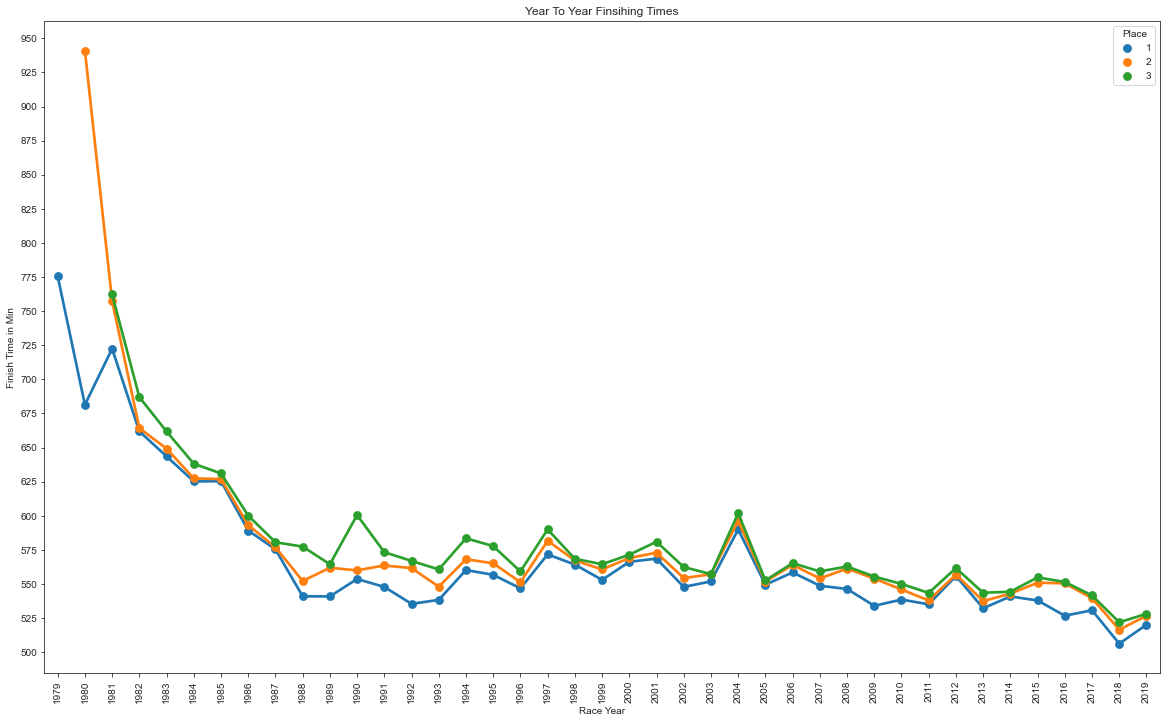

In [47]:
# Average finishing time over the years for each position
plt.figure(figsize = [20,12])
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,1000,25))
sb.set_style('ticks')
sb.pointplot(data = df_female, y = 'Minutes', x = 'Year', hue = 'Place', ci = None)
plt.ylabel ('Finish Time in Min')
plt.xlabel ("Race Year")
plt.title('Year To Year Finsihing Times');

# Who are the fastest Females to finish Kona Race?

In [49]:
df_female.sort_values(by = 'Minutes', inplace = True)
df_female.head(10)

C:\users\lenovo\ztm\projects\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Place,Athlete,Country,Time,Gender,Minutes
130,2018,1,Daniela Ryf,SUI,08:26:18,Female,506.30
172,2018,2,Lucy Charles,GBR,08:36:32,Female,516.53
129,2019,1,Anne Haug,GER,08:40:10,Female,520.17
213,2018,3,Anne Haug,GER,08:41:57,Female,521.95
171,2019,2,Lucy Charles,GBR,08:46:44,Female,526.73
132,2016,1,Daniela Ryf,SUI,08:46:46,Female,526.77
212,2019,3,Sarah Crowley,AUS,08:48:13,Female,528.22
131,2017,1,Daniela Ryf,SUI,08:50:47,Female,530.78
135,2013,1,Mirinda Carfrae,AUS,08:52:14,Female,532.23
139,2009,1,Chrissie Wellington,GBR,08:54:02,Female,534.03


### The fastest Five Females to finish 

In [63]:
df_female.reset_index(inplace = True)

In [67]:
name = [df_female['Athlete'][0], df_female['Athlete'][1], df_female['Athlete'][2],df_female['Athlete'][3],df_female['Athlete'][4]]
place = [df_female['Place'][0], df_female['Place'][1], df_female['Place'][2],df_female['Place'][3],df_female['Place'][4]]
mint = [df_female['Minutes'][0], df_female['Minutes'][1], df_female['Minutes'][2],df_female['Minutes'][3],df_female['Minutes'][4]]
time = [df_female['Time'][0], df_female['Time'][1], df_female['Time'][2],df_female['Time'][3],df_female['Time'][4]]
year = [df_female['Year'][0], df_female['Year'][1], df_female['Year'][2],df_female['Year'][3],df_female['Year'][4]]
 

In [81]:
print (f'{name[0]} finsihed the Race in position No.{place[0]} - in {mint[0]} min - ({time[0]})hrs - Year - {year[0]}')
print (f'{name[1]} finsihed the Race in position No.{place[1]} - in {mint[1]} min - ({time[1]})hrs - Year - {year[1]}')
print (f'{name[2]} finsihed the Race in position No.{place[2]} - in {mint[2]} min - ({time[2]})hrs - Year - {year[2]}')
print (f'{name[3]} finsihed the Race in position No.{place[3]} - in {mint[3]} min - ({time[3]})hrs - Year - {year[3]}')
print (f'{name[4]} finsihed the Race in position No.{place[4]} - in {mint[4]} min - ({time[4]})hrs - Year - {year[4]}')

Daniela Ryf finsihed the Race in position No.1 - in 506.3 min - (08:26:18)hrs - Year - 2018
Lucy Charles finsihed the Race in position No.2 - in 516.53 min - (08:36:32)hrs - Year - 2018
Anne Haug finsihed the Race in position No.1 - in 520.17 min - (08:40:10)hrs - Year - 2019
Anne Haug finsihed the Race in position No.3 - in 521.95 min - (08:41:57)hrs - Year - 2018
Lucy Charles finsihed the Race in position No.2 - in 526.73 min - (08:46:44)hrs - Year - 2019


## After exploring Female Athletes we can explore the full dataset and compare few metrics:

### Country with most podium finishes (Male & Female)?

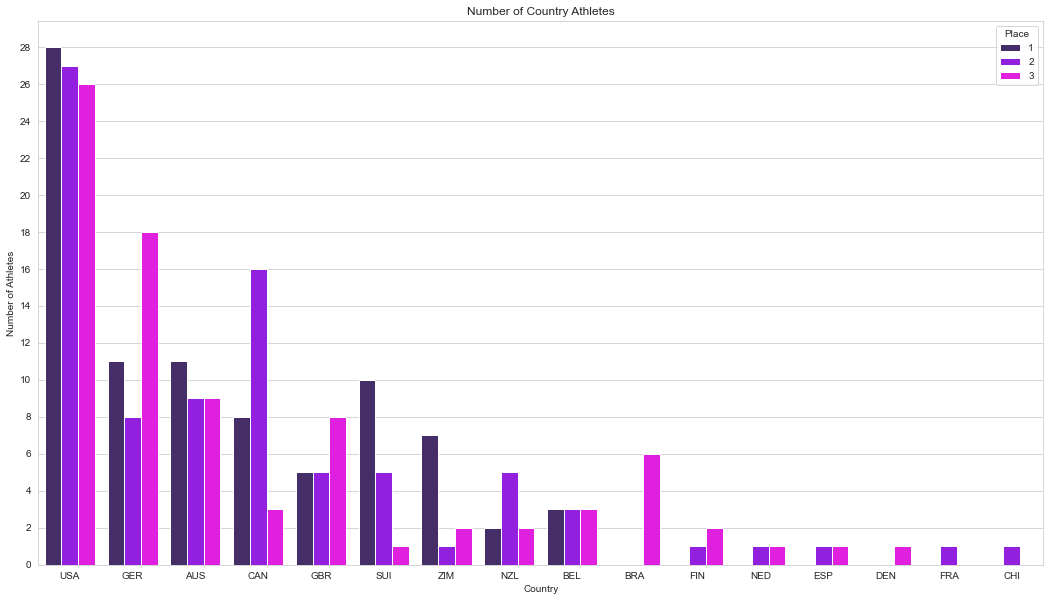

In [88]:
# Number of first / second / third podium finishes for each country
country_order = df['Country'].value_counts()
base_color = sb.color_palette("Spectral")[4]
plt.figure(figsize = (18,10))
sb.set_style('whitegrid')
sb.countplot(data = df, x = 'Country', 
             order = country_order.index, 
             hue = 'Place',
             palette=['#432371',"#9900ff","#ff00ff"])
plt.ylabel ('Number of Athletes')
plt.title ('Number of Country Athletes')
plt.yticks(np.arange(0,30,2))
plt.legend (title = 'Place', loc = 'upper right');

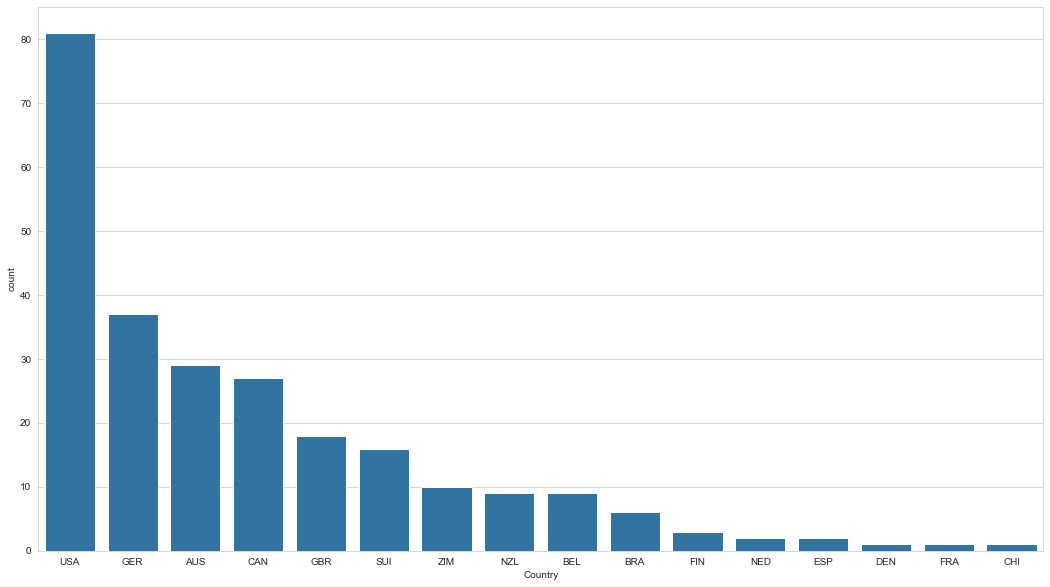

In [91]:
plt.figure(figsize = (18,10))
sb.set_style('whitegrid')
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Country', 
             order = country_order.index, color = base_color);

#### The USA has 81 Podium finishes, Germany comes second with 37, then Australia 29, then Canada 27 and Great Britan with 18 Podium Finsihes.

## What if we check only the last ten years do you thinsk USA will still be on top ?

In [94]:
df_last_ten_year = df[df['Year']>=2009]
df_last_ten_year

,Year,Place,Athlete,Country,Time,Gender,Minutes
0,2019,1,Jan Frodeno,GER,07:51:13,Male,471.22
1,2018,1,Patrick Lange,GER,07:52:39,Male,472.65
2,2017,1,Patrick Lange,GER,08:01:40,Male,481.67
3,2016,1,Jan Frodeno,GER,08:06:30,Male,486.50
4,2015,1,Jan Frodeno,GER,08:14:40,Male,494.67
...,...,...,...,...,...,...,...
218,2013,3,Liz Blatchford,GBR,09:03:35,Female,543.58
219,2012,3,Mirinda Carfrae,AUS,09:21:41,Female,561.68
220,2011,3,Leanda Cave,GBR,09:03:29,Female,543.48
221,2010,3,Julie Dibens,GBR,09:10:04,Female,550.07


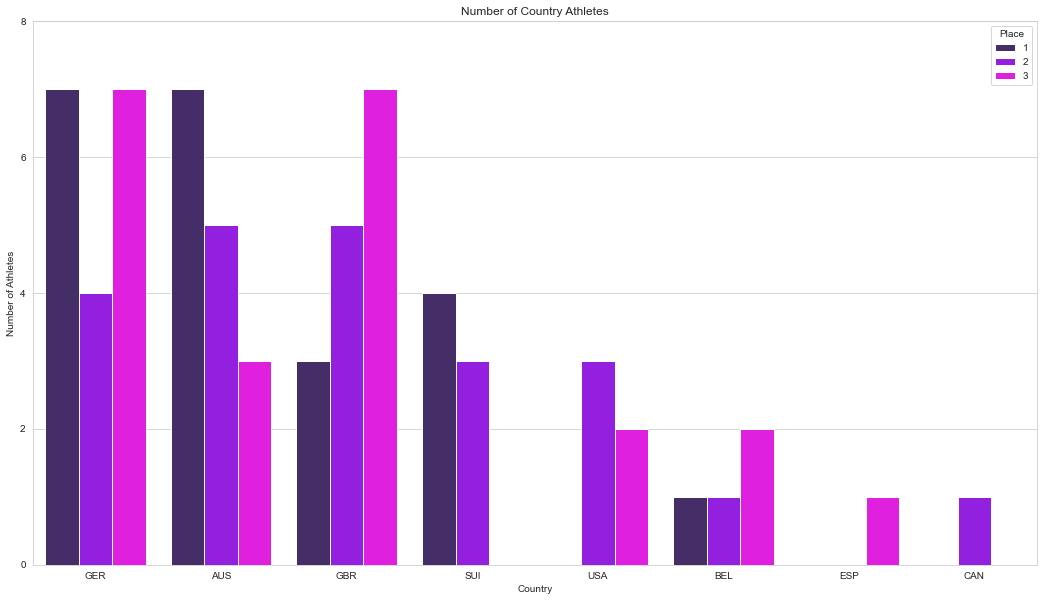

In [97]:
# Number of first / second / third podium finishes for each country
country_order = df_last_ten_year['Country'].value_counts()
base_color = sb.color_palette("Spectral")[4]
plt.figure(figsize = (18,10))
sb.set_style('whitegrid')
sb.countplot(data = df_last_ten_year, x = 'Country', 
             order = country_order.index, 
             hue = 'Place',
             palette=['#432371',"#9900ff","#ff00ff"])
plt.ylabel ('Number of Athletes')
plt.title ('Number of Country Athletes')
plt.yticks(np.arange(0,10,2))
plt.legend (title = 'Place', loc = 'upper right');

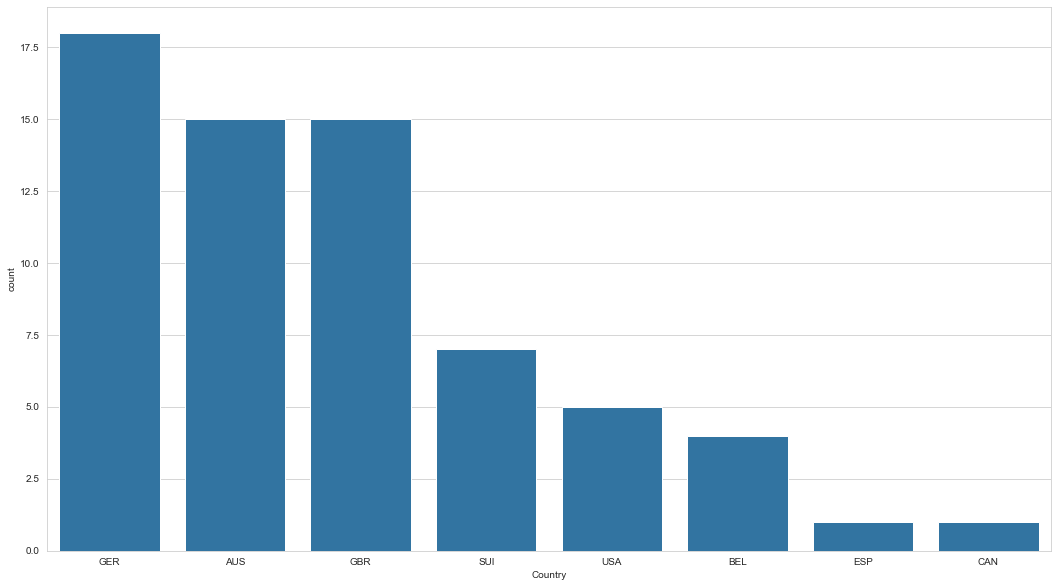

In [98]:
plt.figure(figsize = (18,10))
sb.set_style('whitegrid')
base_color = sb.color_palette()[0]
sb.countplot(data = df_last_ten_year, x = 'Country', 
             order = country_order.index, color = base_color);

In [101]:
df_last_ten_year['Country'].value_counts()

GER    18
AUS    15
GBR    15
SUI     7
USA     5
BEL     4
ESP     1
CAN     1
Name: Country, dtype: int64

## Compare Male vs Female Athletes finish times 

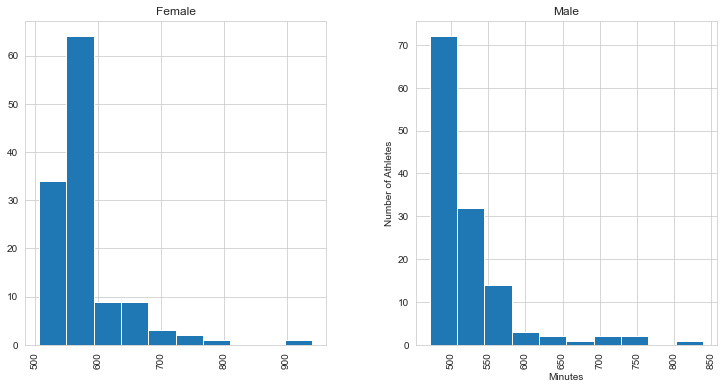

In [125]:
# Male Vs Female Finish Time Histograms

df.hist(by = 'Gender', column = 'Minutes', 
        figsize = [12,6])
plt.xlabel('Minutes')
plt.ylabel('Number of Athletes');

In [132]:
female_average_minutes = np .round(df_female['Minutes'].mean(), 2)
print (f'Female Athlete average finish times = {female_average_minutes} minutes')

Female Athlete average finish times = 578.77 minutes


In [133]:
male_average_minutes = np.round(df_male['Minutes'].mean(), 2)
print (f'Male Athlete average finish times = {male_average_minutes} minutes')

Male Athlete average finish times = 524.05 minutes


In [138]:
average_diff = np.round(female_average_minutes - male_average_minutes,2)
average_diff

54.72

In [195]:
print (f'Average difference in Finishing time Between Male and Female Athletes = {average_diff} Min')  

Average difference in Finishing time Between Male and Female Athletes = 54.72 Min


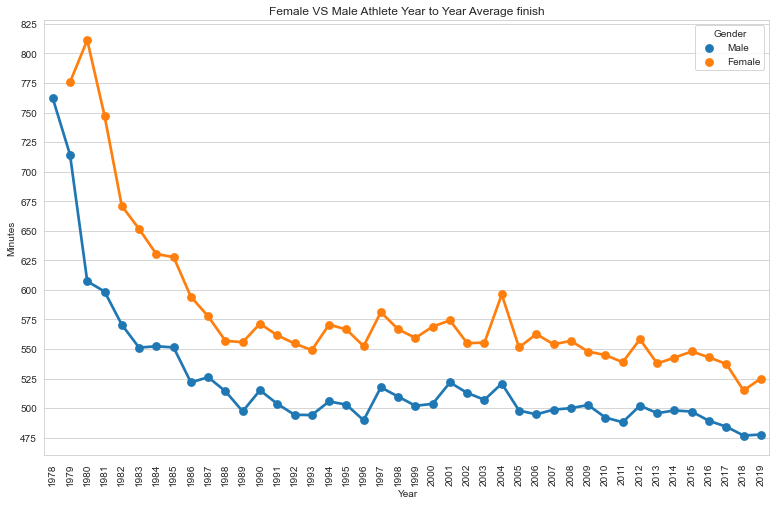

In [127]:
# Female VS Male Average finish times year to year
plt.figure(figsize = [13,8])
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,1000,25))
sb.pointplot(data = df, y = 'Minutes', x = 'Year', hue = 'Gender', ci = None)
plt.title('Female VS Male Athlete Year to Year Average finish');

#### From Graph we observe female athletes performance is developing with male athletes performance and the gap from year to year is almost the same   

## Comparision between average finish time for First, Second and Third places

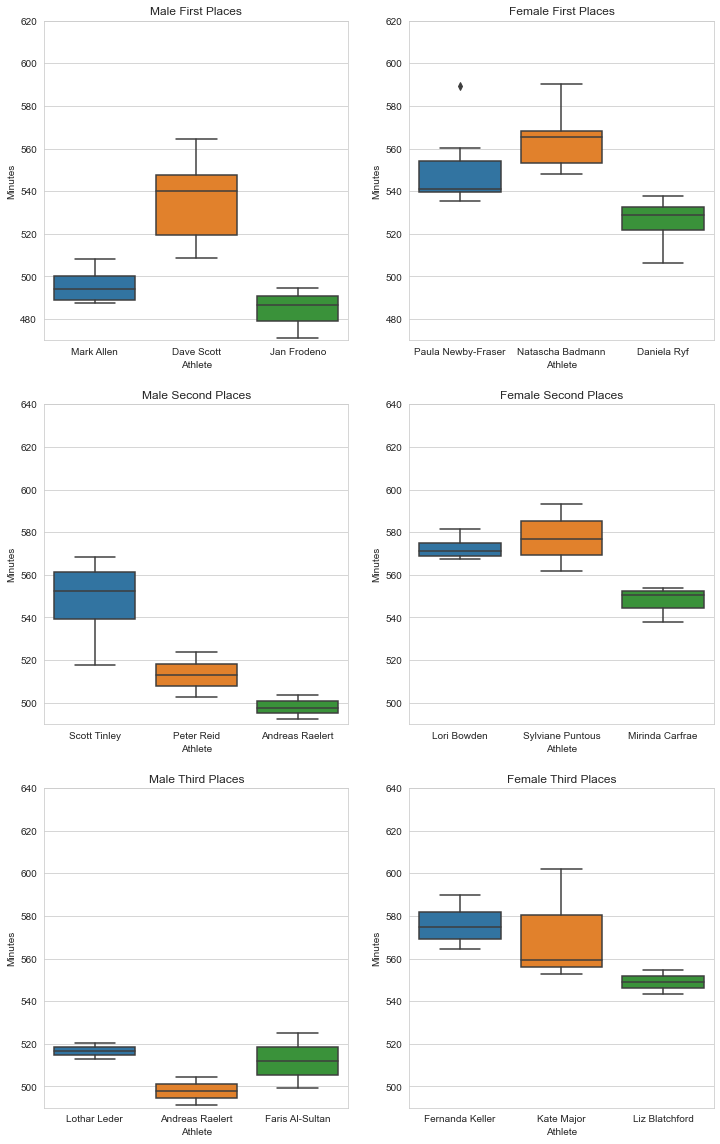

In [194]:
# Male vs Female Athletes
f_a_order = df_male_first['Athlete'].value_counts()[:3]
s_a_order = df_male_second['Athlete'].value_counts()[:3]
t_a_order = df_male_third['Athlete'].value_counts()[:3]
f_f_a_order = df_female_first['Athlete'].value_counts()[:3]
f_s_a_order = df_female_second['Athlete'].value_counts()[:3]
f_t_a_order = df_female_third['Athlete'].value_counts()[:3]
plt.figure(figsize = (12,20))
plt.subplot(3,2,1)
sb.boxplot(data = df_male_first, x = 'Athlete', y = 'Minutes', order = f_a_order.index)
plt.ylim((470, 620))
plt.title('Male First Places')
plt.subplot(3,2,2)
sb.boxplot(data = df_female_first, x = 'Athlete', y = 'Minutes', order = f_f_a_order.index)
plt.ylim((470, 620))
plt.title('Female First Places')

plt.subplot(3,2,3)
sb.boxplot(data = df_male_second, x = 'Athlete', y = 'Minutes', order = s_a_order.index)
plt.ylim((490, 640))
plt.title('Male Second Places')
plt.subplot(3,2,4)
sb.boxplot(data = df_female_second, x = 'Athlete', y = 'Minutes', order = f_s_a_order.index)
plt.ylim((490, 640))
plt.title('Female Second Places')
plt.subplot(3,2,5)
sb.boxplot(data = df_male_third, x = 'Athlete', y = 'Minutes', order = t_a_order.index)
plt.ylim((490, 640))
plt.title('Male Third Places')
plt.subplot(3,2,6)
sb.boxplot(data = df_female_third, x = 'Athlete', y = 'Minutes', order = f_t_a_order.index)
plt.ylim((490, 640))
plt.title('Female Third Places');